# AOS_DM_29356_gen3_ingest

Notebook to develop what in the final version gets put in `/ts_analysis_notebooks/aos/image_ingestion/



This doesn't plot the correct x,y bounds, and I have no idea why ... 

Using /project/scichris/aos/images/lsstCam/letter_R22/DATA/


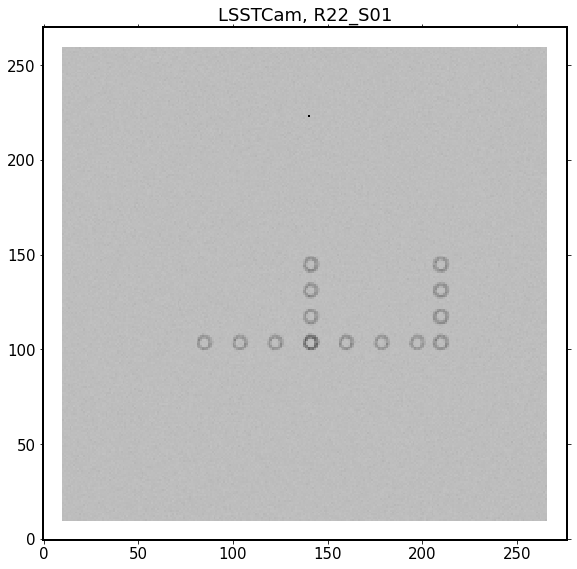

In [2]:
%matplotlib inline
from lsst.daf import butler as dafButler
import lsst.afw.cameraGeom.utils as cameraGeomUtils
import lsst.afw.display as afwDisplay
import matplotlib.pyplot as plt
from matplotlib import rcParams 
from astropy.io import fits
from astropy.visualization import ZScaleInterval

import numpy as np 
import os 
rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18

detector_name = 'R22_S01'

repo_dir = '/project/scichris/aos/images/lsstCam/letter_R22/DATA/'
instrument = 'LSSTCam'

print(f'Using {repo_dir}')
butler = dafButler.Butler(repo_dir, collections=[f'{instrument}/raw/all',
                                                 f'{instrument}/calib','run1',
                                                 f'{instrument}/calib/unbounded']
                         )


# we find out  the  exposure  number
dataId0 = dict(instrument=instrument)
dataset = next(iter(
                    butler.registry.queryDatasets(
                        datasetType='postISRCCD', 
                        collections=['run1'],
                        dataId=dataId0  )
                   )
               )
exposure_number = dataset.dataId["exposure"]

exposure = butler.get('postISRCCD', detector=detector_name, instrument=instrument,
          exposure=exposure_number,collections=['run1'])
detector = exposure.getDetector()

# get the camera to plot with cameraGeomUtils 
camera  = butler.get("camera", instrument=instrument, exposure=exposure_number)


afwDisplay.setDefaultBackend("matplotlib")

    
# make plotting space 
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=0.2, wspace=0.0, )

disp = afwDisplay.Display(fig)

data = exposure.image.array
zscale = ZScaleInterval()
vmin, vmax = zscale.get_limits(data)
disp.scale("linear",min=vmin,max=vmax)
disp.setImageColormap('Greys')
dataType = "postISRCCD"

ax = fig.add_subplot(1, 1, 1)

mos = cameraGeomUtils.showCamera(camera,
                             cameraGeomUtils.ButlerImage(butler, dataType, 
                                                         instrument=instrument, 
                                                         exposure=exposure_number,
                                                         verbose=True),
                             binSize=16, 
                             detectorNameList=[detector.getName()] , 
                             display=disp, overlay=False,
                             title=f'{instrument}, {detector.getName()}')
disp.show_colorbar(False)



This has wrong x,y axis labels (numbers should run up to `~4000x4000`), I don't know why ... 